<a href="https://colab.research.google.com/github/Arbind96/Nlp/blob/main/BankNote_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path="/content/drive/MyDrive/DeepLearning/Assignment/data_banknote_authentication.txt"
data=pd.read_csv(path, header=None)

In [7]:
print(data)

            0         1        2        3  4
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -0.55949  1
1368 -1.38870  -4.87730   6.4774  0.34179  1
1369 -3.75030 -13.45860  17.5932 -2.77710  1
1370 -3.56370  -8.38270  12.3930 -1.28230  1
1371 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 5 columns]


In [8]:
data.shape

(1372, 5)

In [17]:
X, y = data.values[:, :-1], data.values[:, -1]

In [18]:
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [19]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [20]:
# determine the number of input features
n_features = X.shape[1]

In [29]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='acc')

In [30]:
# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test,y_test))

Epoch 1/50
29/29 [==============================] - 1s 7ms/step - loss: 2.6936 - acc: 0.5800 - val_loss: 2.7072 - val_acc: 0.5497
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 2.1921 - acc: 0.5919 - val_loss: 2.1567 - val_acc: 0.5497
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 1.7155 - acc: 0.5963 - val_loss: 1.6313 - val_acc: 0.5541
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 1.2603 - acc: 0.6094 - val_loss: 1.1432 - val_acc: 0.5806
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 0.8624 - acc: 0.6507 - val_loss: 0.7624 - val_acc: 0.6534
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5875 - acc: 0.7073 - val_loss: 0.5250 - val_acc: 0.6998
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4205 - acc: 0.7595 - val_loss: 0.3942 - val_acc: 0.7660
Epoch 8/50
29/29 [==============================] - 0s 3ms/step - loss: 0.3216 - acc: 0.81

In [31]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.05008998140692711
Test accuracy: 0.9911699891090393


In [32]:
# predict test set and convert to class label
ypred = model.predict(X_test)
yhat = (ypred > 0.5).flatten().astype(int)

In [33]:
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.991


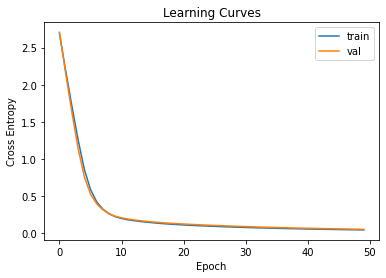

In [36]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()